# <div style="background: linear-gradient(135deg, #6e8efb, #a777e3);padding: 30px;border-radius: 15px;box-shadow: 0 4px 15px rgba(0,0,0,0.2);text-align: center;color: white;font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;"><h1 style="margin: 0; font-size: 40px; border: none; color: white;">Анализ личности клиента</h1><p style="margin: 10px 0 0; font-size: 18px; opacity: 0.9; text-align:center">Анализ данных, Кластеризация и создание моделей (+ Интерактивный Дашбоард)</p>
</div>

<div style="
    background-color: #f8f9fa;
    border-left: 8px solid #6e8efb;
    padding: 15px;
    border-radius: 5px;
    font-family: sans-serif;">
    <details>
        <summary style="font-weight: bold; font-size: 20px; cursor: pointer;">Данный файл является сводкой нескольких разных решений и файлов которые можно посмотреть тут</summary>
        <ul style="margin-top: 10px; line-height: 1.8;">
            <li><a href="./notebooks/Elements.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">Шаблоны элементов для красивого и быстрого оформления markdown</a></li>
            <li><a href="./notebooks/eda.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">1. EDA, Первончальный анализ данных</a></li>
            <li><a href="./notebooks/clustering.ipynb" style="color: #6e8efb; text-decoration: none; font-weight: bold;">2. Кластеризация и первоначальная обработка данных</a></li>
        </ul>
    </details>
</div>

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
    <strong>ℹ️ Описание:</strong><p>Анализ личности клиента помогает предприятию модифицировать продукт в зависимости от  целевых сегментов. Например, вместо того чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных, компания может проанализировать, какой сегмент наиболее склонен к покупке, и направить маркетинговые усилия именно на эту конкретную группу</p>
    <p>Данное иследование строиться как раз для того чтобы определить к какой группе относится тот или иной человек</p>
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Импорт беблиотек</strong></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import integrate, optimize
from sklearn import preprocessing, model_selection, metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from IPython.display import display
%matplotlib inline

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Импорт данных</strong></div>

In [3]:
df = pd.read_csv('./data/marketing_campaign.csv',sep='\t')

### <div style="padding: 15px; border-radius: 10px; background-color: #fff3e0; border-left: 6px solid #ff9800; color: #e65100;font-size:20px"><strong>⚠️ Важно:</strong> Перед запуском этой ячейки убедитесь, что в папке <code>/data</code> лежит файл <code>marketing_campaign.csv</code>.</div>

<div style="background:linear-gradient(135deg,#e3f2fd 0%,#f0e6ff 100%);border-left:6px solid #6e8efb;border-radius:12px;padding:20px 25px;box-shadow:0 4px 18px rgba(110,142,251,0.13);margin-bottom:18px;">
  <span style="font-size:20px;font-weight:800;color:#0d47a1;letter-spacing:1px;">📋 Содержание (Признаки)</span>
  <p style="color:#37474f;margin:8px 0 0;font-size:14px;">Описание всех признаков датасета, разбитых по группам.</p>
</div>

<!-- ======================== ЛЮДИ ======================== -->
<div style="background:linear-gradient(120deg,#e3f2fd 60%,#e8eaff 100%);border-left:6px solid #2196f3;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(33,150,243,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#0d47a1;">👤 Люди (People)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#1565c0;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>ID</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уникальный идентификатор клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Year_Birth</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Год рождения клиента</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Education</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уровень образования</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Marital_Status</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Семейное положение</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Income</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Годовой доход домохозяйства клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Kidhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество детей в семье</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Teenhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество подростков в семье</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Dt_Customer</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Дата регистрации клиента в компании</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Recency</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество дней с момента последней покупки</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;"><strong>Complain</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">1</code> — жалоба в последние 2 года, инач��
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДУКТЫ ======================== -->
<div style="background:linear-gradient(120deg,#e8f5e9 60%,#e8eaff 100%);border-left:6px solid #43a047;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(67,160,71,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#1b5e20;">🛒 Продукты (Products)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#2e7d32;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntWines</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на вино за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFruits</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на фрукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntMeatProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на мясные продукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFishProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на рыбу за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntSweetProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на сладости за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;"><strong>MntGoldProds</strong></td>
        <td style="padding:8px 14px;color:#263238;">Сумма, потраченная на изделия из золота за последние 2 года</td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДВИЖЕНИЕ ======================== -->
<div style="background:linear-gradient(120deg,#fff8e1 60%,#ffe0e0 100%);border-left:6px solid #ffa000;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(255,160,0,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#e65100;">📣 Продвижение (Promotion)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#e65100;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>NumDealsPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">Количество покупок, совершённых со скидкой</td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp1</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>1-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp2</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение во <strong>2-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp3</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>3-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp4</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>4-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp5</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>5-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;"><strong>Response</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>последней</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== КАНАЛЫ ПРОДАЖ ======================== -->
<div style="background:linear-gradient(120deg,#fce4ec 60%,#e8eaff 100%);border-left:6px solid #e91e63;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(233,30,99,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#880e4f;">🏪 Каналы продаж (Place)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#880e4f;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumWebPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок через сайт компании</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumCatalogPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок по каталогу</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumStorePurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок непосредственно в магазинах</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;"><strong>NumWebVisitsMonth</strong></td>
        <td style="padding:8px 14px;color:#263238;">Количество посещений сайта за последний месяц</td>
      </tr>
    </tbody>
  </table>
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Метод describe</strong></div>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<div style="background:linear-gradient(135deg,#e3f2fd 0%,#f0e6ff 100%);border-left:6px solid #6e8efb;border-radius:12px;padding:20px 25px;box-shadow:0 4px 18px rgba(110,142,251,0.13);margin-bottom:18px;">
  <span style="font-size:20px;font-weight:800;color:#0d47a1;letter-spacing:1px;">📋 Содержание (Признаки)</span>
  <p style="color:#37474f;margin:8px 0 0;font-size:14px;">Описание всех признаков датасета, разбитых по группам.</p>
</div>

<!-- ======================== ЛЮДИ ======================== -->
<div style="background:linear-gradient(120deg,#e3f2fd 60%,#e8eaff 100%);border-left:6px solid #2196f3;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(33,150,243,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#0d47a1;">👤 Люди (People)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#1565c0;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>ID</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уникальный идентификатор клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Year_Birth</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Год рождения клиента</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Education</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Уровень образования</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Marital_Status</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Семейное положение</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Income</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Годовой доход домохозяйства клиента</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Kidhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество детей в семье</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Teenhome</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество подростков в семье</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Dt_Customer</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Дата регистрации клиента в компании</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;"><strong>Recency</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #bbdefb;color:#263238;">Количество дней с момента последней покупки</td>
      </tr>
      <tr style="background:rgba(227,242,253,0.5);">
        <td style="padding:8px 14px;"><strong>Complain</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">1</code> — жалоба в последние 2 года, инач��
          <code style="background:#bbdefb;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДУКТЫ ======================== -->
<div style="background:linear-gradient(120deg,#e8f5e9 60%,#e8eaff 100%);border-left:6px solid #43a047;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(67,160,71,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#1b5e20;">🛒 Продукты (Products)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#2e7d32;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntWines</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на вино за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFruits</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на фрукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntMeatProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на мясные продукты за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntFishProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на рыбу за последние 2 года</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;"><strong>MntSweetProducts</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #c8e6c9;color:#263238;">Сумма, потраченная на сладости за последние 2 года</td>
      </tr>
      <tr style="background:rgba(232,245,233,0.5);">
        <td style="padding:8px 14px;"><strong>MntGoldProds</strong></td>
        <td style="padding:8px 14px;color:#263238;">Сумма, потраченная на изделия из золота за последние 2 года</td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== ПРОДВИЖЕНИЕ ======================== -->
<div style="background:linear-gradient(120deg,#fff8e1 60%,#ffe0e0 100%);border-left:6px solid #ffa000;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(255,160,0,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#e65100;">📣 Продвижение (Promotion)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#e65100;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>NumDealsPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">Количество покупок, совершённых со скидкой</td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp1</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>1-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp2</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение во <strong>2-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp3</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>3-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp4</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>4-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,248,225,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;"><strong>AcceptedCmp5</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #ffe082;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>5-й</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;"><strong>Response</strong></td>
        <td style="padding:8px 14px;color:#263238;">
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">1</code> — принял предложение в <strong>последней</strong> кампании, иначе
          <code style="background:#ffe082;padding:1px 5px;border-radius:4px;">0</code>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<!-- ======================== КАНАЛЫ ПРОДАЖ ======================== -->
<div style="background:linear-gradient(120deg,#fce4ec 60%,#e8eaff 100%);border-left:6px solid #e91e63;border-radius:10px;padding:16px 22px;box-shadow:0 2px 10px rgba(233,30,99,0.10);margin-bottom:16px;">
  <strong style="font-size:17px;color:#880e4f;">🏪 Каналы продаж (Place)</strong>
  <table style="width:100%;border-collapse:collapse;margin-top:12px;font-size:14px;">
    <thead>
      <tr style="background:#880e4f;color:white;">
        <th style="padding:10px 14px;text-align:left;border-radius:6px 0 0 0;width:30%;">Признак</th>
        <th style="padding:10px 14px;text-align:left;border-radius:0 6px 0 0;">Описание</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumWebPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок через сайт компании</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumCatalogPurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок по каталогу</td>
      </tr>
      <tr style="background:rgba(255,255,255,0.6);">
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;"><strong>NumStorePurchases</strong></td>
        <td style="padding:8px 14px;border-bottom:1px solid #f8bbd0;color:#263238;">Количество покупок непосредственно в магазинах</td>
      </tr>
      <tr style="background:rgba(252,228,236,0.5);">
        <td style="padding:8px 14px;"><strong>NumWebVisitsMonth</strong></td>
        <td style="padding:8px 14px;color:#263238;">Количество посещений сайта за последний месяц</td>
      </tr>
    </tbody>
  </table>
</div>

# <div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #21c2f3; color: #0d47a1;font-size:25px"><strong>Поиск пустых полей</strong></div>

In [15]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<div style="padding: 15px; border-radius: 10px; background-color: #e3f2fd; border-left: 6px solid #2196f3; color: #0d47a1;">
    <strong>:</strong><p></p>
</div>

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [19]:
df_eda = df.copy()

In [22]:
drop_cols = ['Z_CostContact', 'Z_Revenue']
df_eda = df_eda.drop(columns=[col for col in drop_cols if col in df_eda.columns])

In [24]:
# Заполнить медианным доходом для людей с таким же образованием и семейным положением
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income']\
                 .transform(lambda x: x.fillna(x.median()))

In [26]:
# проверка
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [28]:
# Общие траты
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_eda['Total_Spending'] = df_eda[spending_cols].sum(axis=1)

In [29]:
# Общие покупки
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 
                 'NumCatalogPurchases', 'NumStorePurchases']
df_eda['Total_Purchases'] = df_eda[purchase_cols].sum(axis=1)

In [31]:
# Средний чек
df_eda['Avg_Check'] = df_eda['Total_Spending'] / df_eda['Total_Purchases'].replace(0, np.nan)

In [33]:
# Участие в кампаниях
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                 'AcceptedCmp4', 'AcceptedCmp5']
df_eda['Total_Accepted_Cmp'] = df_eda[campaign_cols].sum(axis=1)
df_eda['Accepted_Any'] = (df_eda['Total_Accepted_Cmp'] > 0).astype(int)

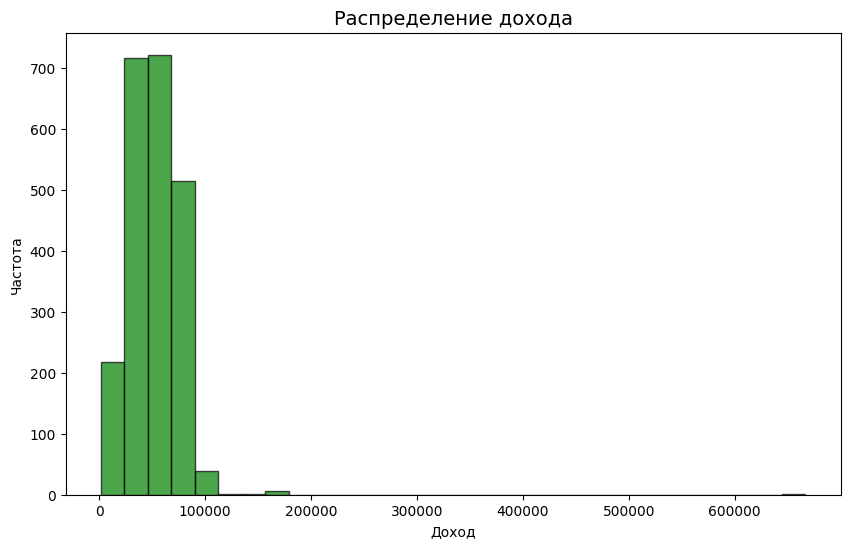

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df_eda['Income'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
plt.title('Распределение дохода', fontsize=14)
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

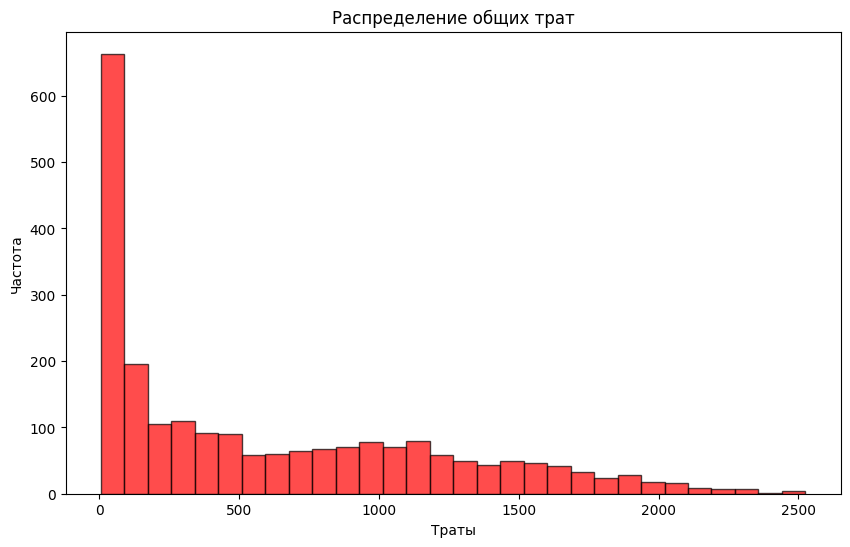

In [35]:
# Общие траты
plt.figure(figsize=(10, 6))
plt.hist(df_eda['Total_Spending'], bins=30, edgecolor='black', alpha=0.7, color='red')
plt.title('Распределение общих трат')
plt.xlabel('Траты')
plt.ylabel('Частота')
plt.show()

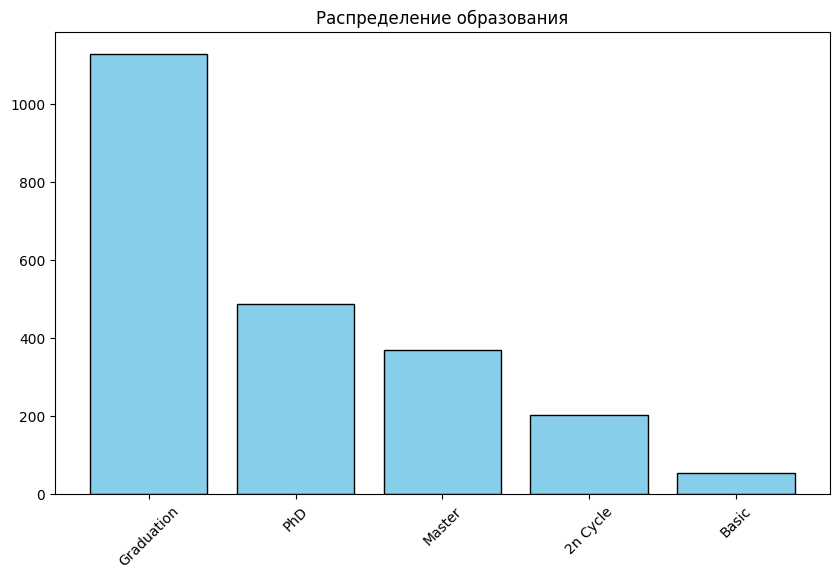

In [36]:
edu_counts = df_eda['Education'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(edu_counts.index, edu_counts.values, color='skyblue', edgecolor='black')
plt.title('Распределение образования')
plt.tick_params(axis='x', rotation=45)
plt.show()


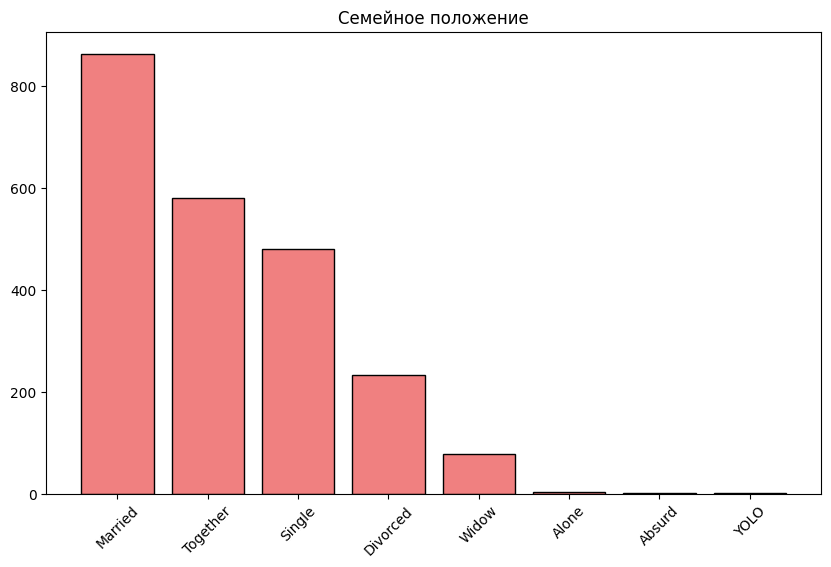

In [37]:
plt.figure(figsize=(10, 6))
marital_counts = df_eda['Marital_Status'].value_counts()
plt.bar(marital_counts.index, marital_counts.values, color='lightcoral', edgecolor='black')
plt.title('Семейное положение')
plt.tick_params(axis='x', rotation=45)
plt.show()

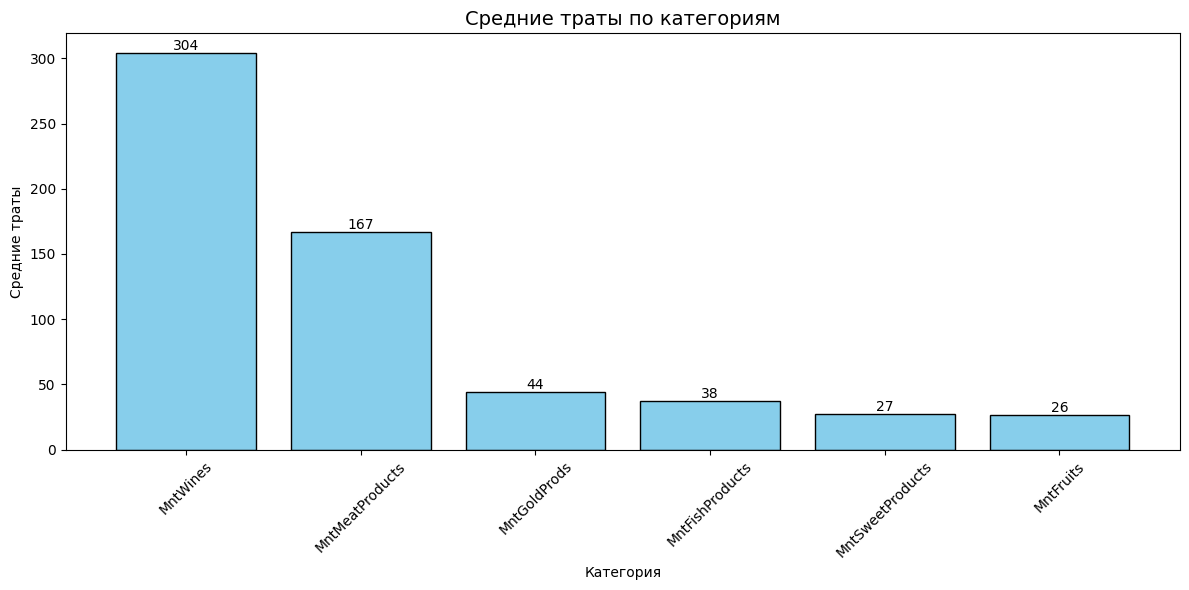


Средние траты по категориям:
MntWines            303.935714
MntMeatProducts     166.950000
MntGoldProds         44.021875
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntFruits            26.302232
dtype: float64


In [38]:
# Средние траты по категориям
avg_spending = df_eda[spending_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_spending.index, avg_spending.values, color='skyblue', edgecolor='black')
plt.title('Средние траты по категориям', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Средние траты')
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nСредние траты по категориям:")
print(avg_spending)

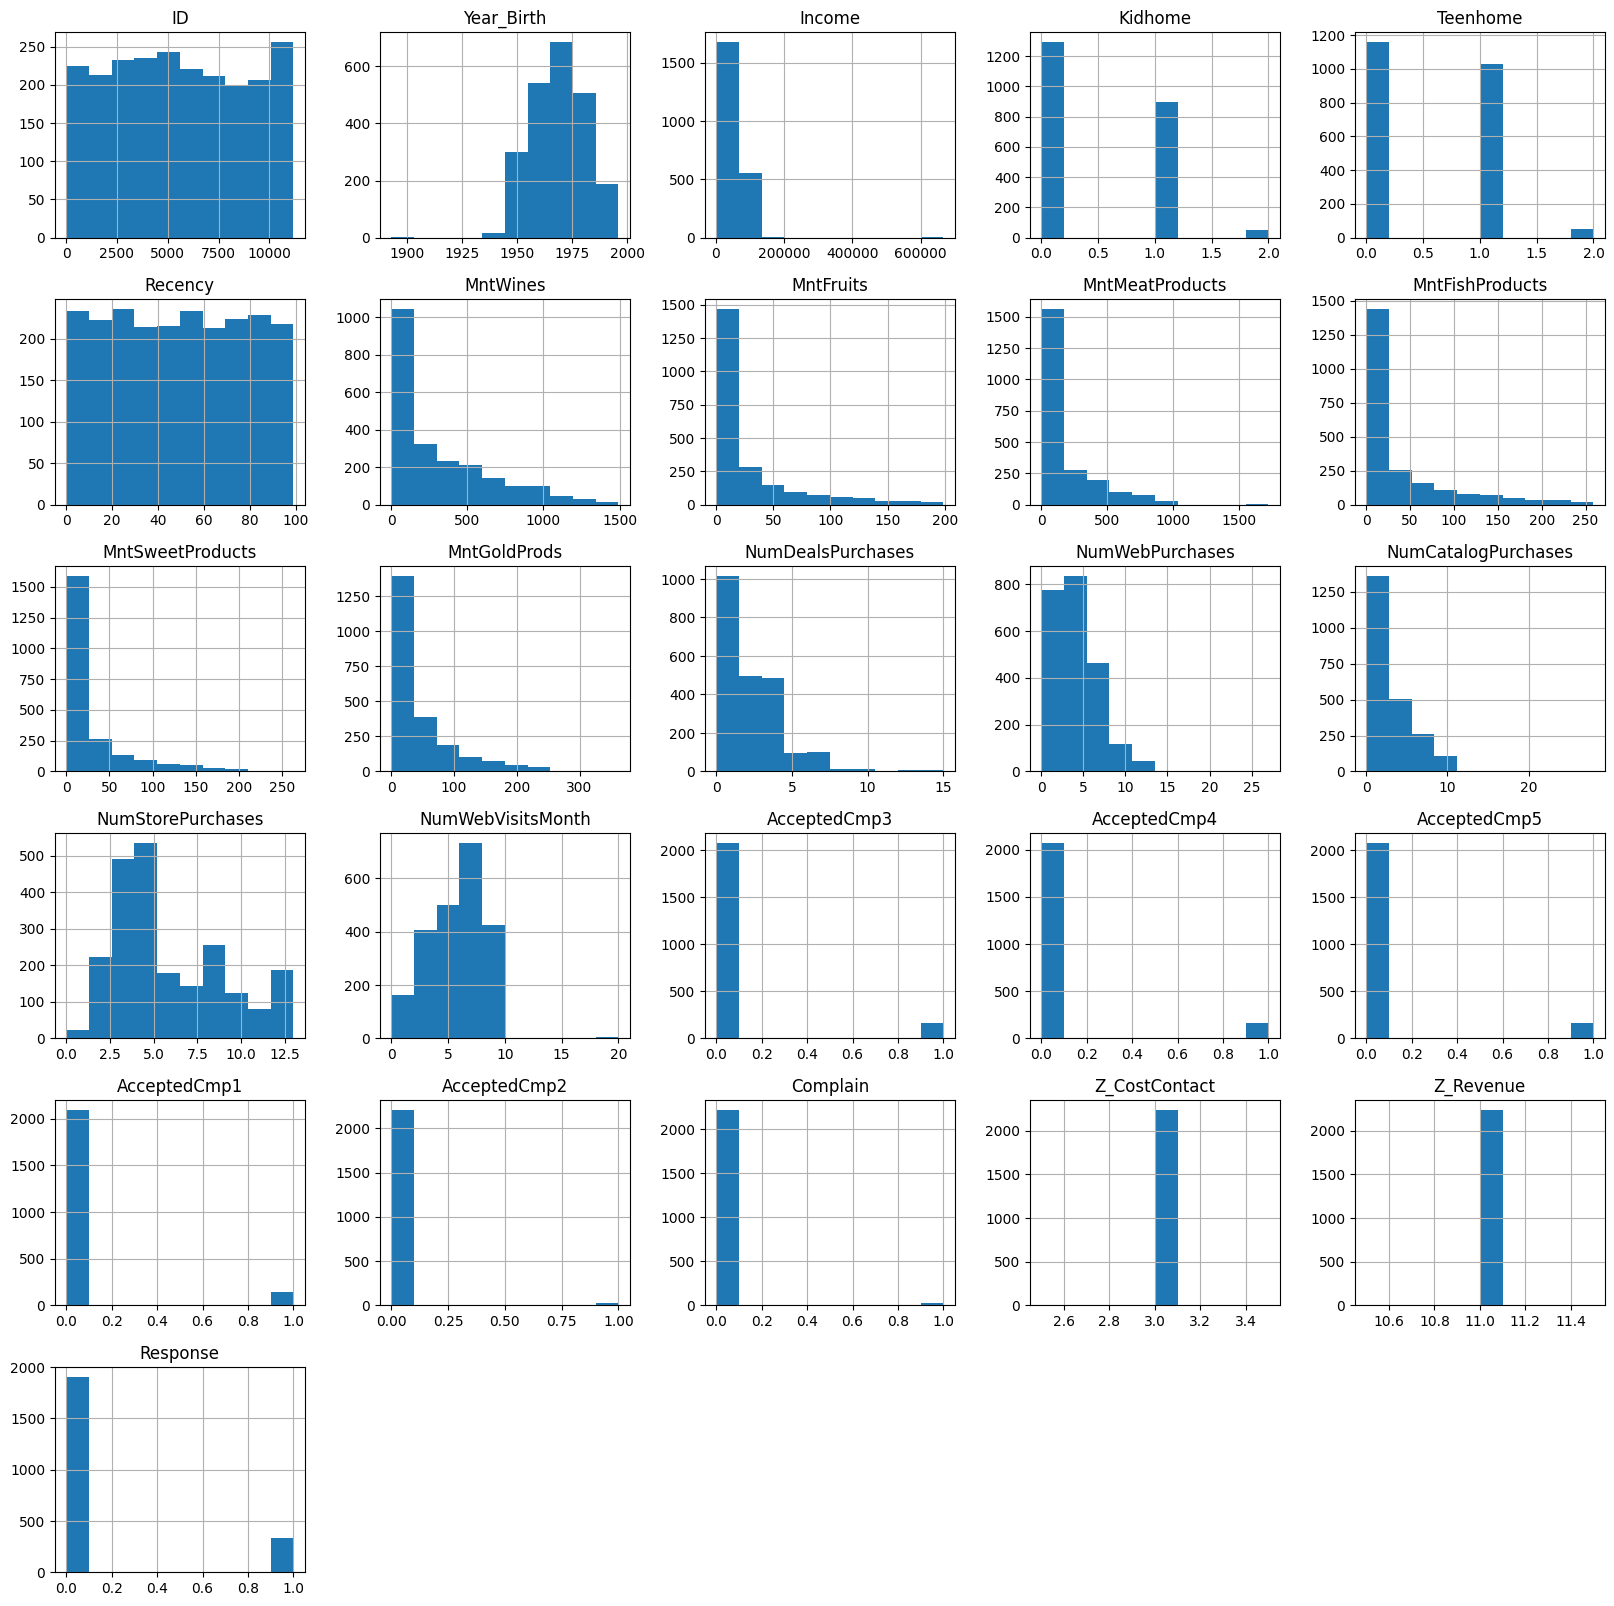

In [39]:
# гистаграммы всех признаков
df.hist(figsize=(20,20))
plt.show()


Топ-10 корреляций с общими тратами:
MntWines               0.891839
MntMeatProducts        0.842965
NumCatalogPurchases    0.778577
Total_Purchases        0.753903
NumStorePurchases      0.674669
Income                 0.667576
MntFishProducts        0.642818
Avg_Check              0.617745
MntFruits              0.614229
MntSweetProducts       0.603016
Name: Total_Spending, dtype: float64


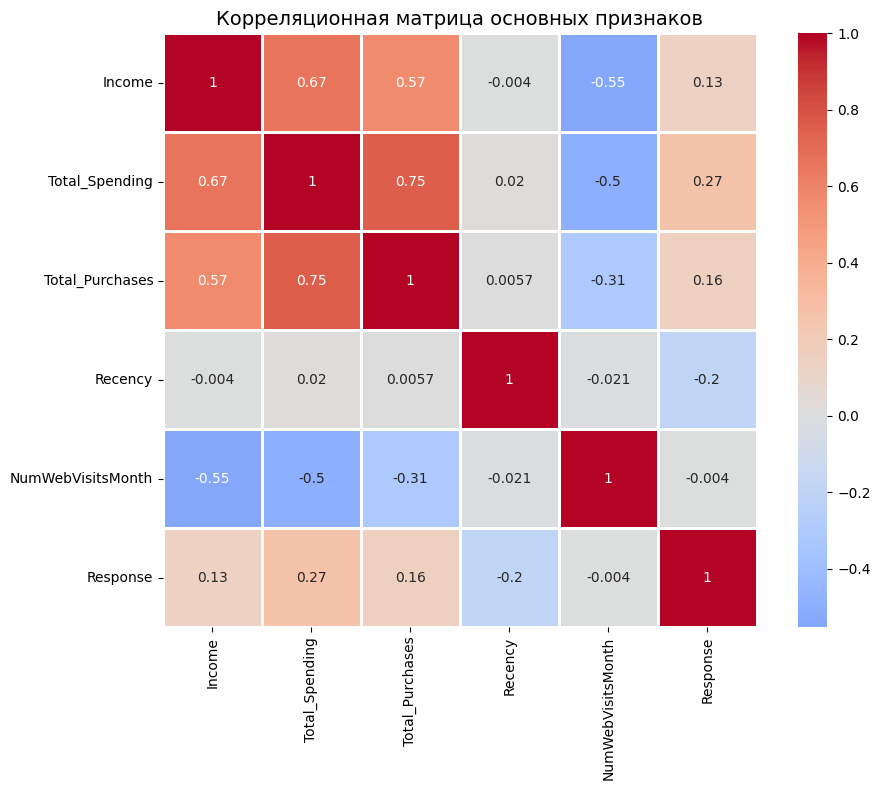

In [40]:
numeric_cols = df_eda.select_dtypes(include=[np.number]).columns
corr_matrix = df_eda[numeric_cols].corr()

# Топ корреляций с Total_Spending
if 'Total_Spending' in corr_matrix.columns:
    top_corr = corr_matrix['Total_Spending'].sort_values(ascending=False)[1:11]
    print("\nТоп-10 корреляций с общими тратами:")
    print(top_corr)

# Тепловая карта (только основные признаки)
main_features = ['Income', 'Total_Spending', 
                 'Total_Purchases', 'Recency', 'NumWebVisitsMonth', 
                  'Response']

plt.figure(figsize=(10, 8))
sns.heatmap(df_eda[main_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1)
plt.title('Корреляционная матрица основных признаков', fontsize=14)
plt.tight_layout()
plt.show()

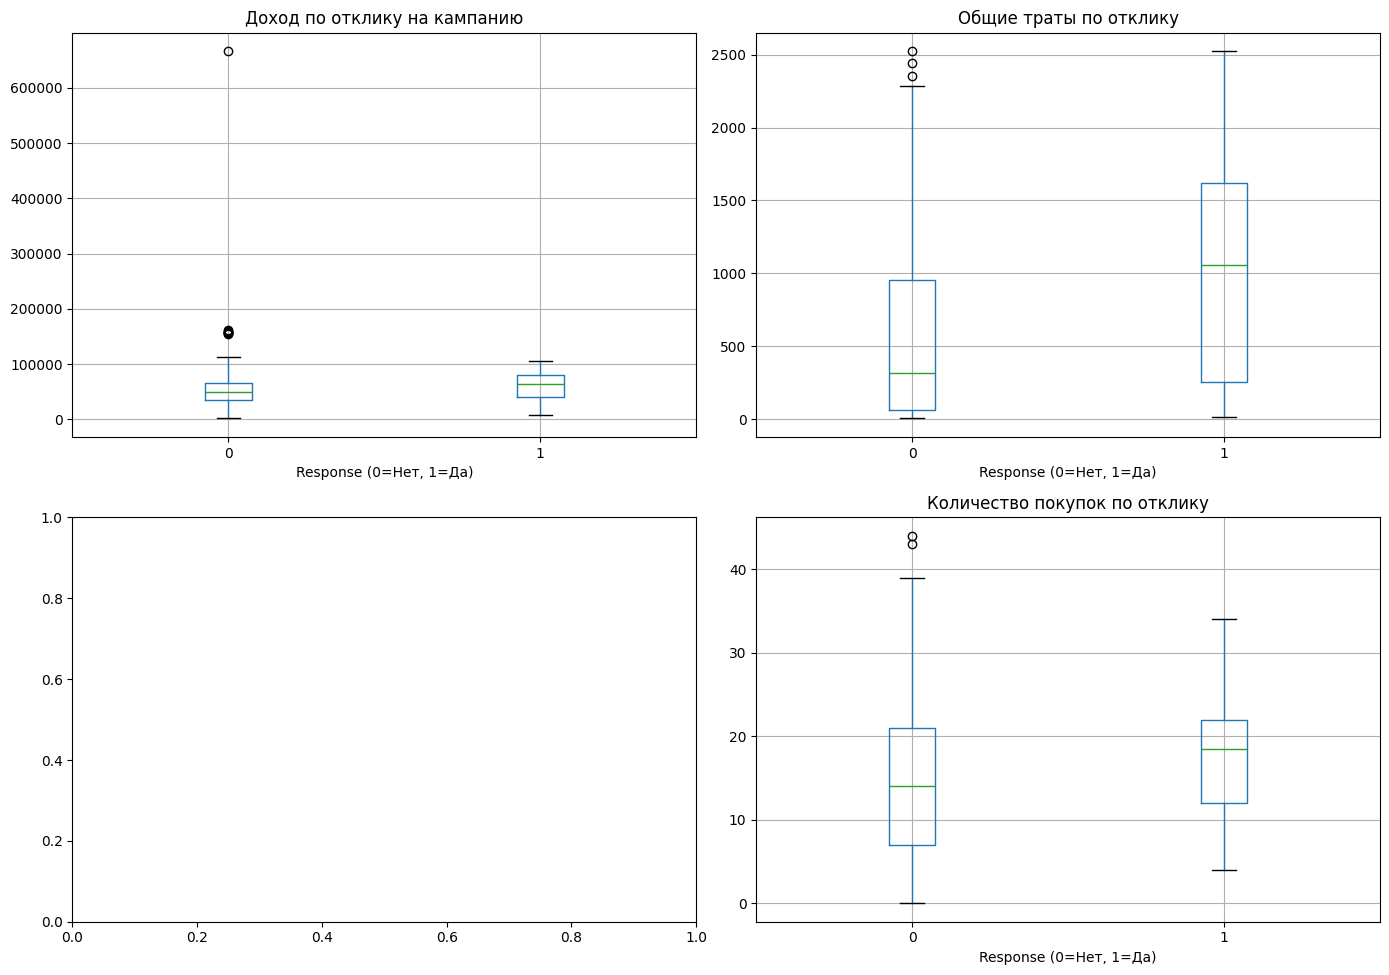


Сравнение Responders vs Non-responders:
                Income  Total_Spending  Total_Purchases
Response                                               
0         50839.132767      538.929171        14.363589
1         60209.675676      987.392216        17.706587


In [41]:
# Сравнение Responders vs Non-responders
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Доход по Response
df_eda.boxplot(column='Income', by='Response', ax=axes[0, 0])
axes[0, 0].set_title('Доход по отклику на кампанию')
axes[0, 0].set_xlabel('Response (0=Нет, 1=Да)')

# Траты по Response
df_eda.boxplot(column='Total_Spending', by='Response', ax=axes[0, 1])
axes[0, 1].set_title('Общие траты по отклику')
axes[0, 1].set_xlabel('Response (0=Нет, 1=Да)')

# Покупки по Response
df_eda.boxplot(column='Total_Purchases', by='Response', ax=axes[1, 1])
axes[1, 1].set_title('Количество покупок по отклику')
axes[1, 1].set_xlabel('Response (0=Нет, 1=Да)')

plt.suptitle('')  # Убираем автоматический заголовок
plt.tight_layout()
plt.show()

# Статистика по группам
print("\nСравнение Responders vs Non-responders:")
response_stats = df_eda.groupby('Response')[['Income', 'Total_Spending', 
                                              'Total_Purchases']].mean()
print(response_stats)

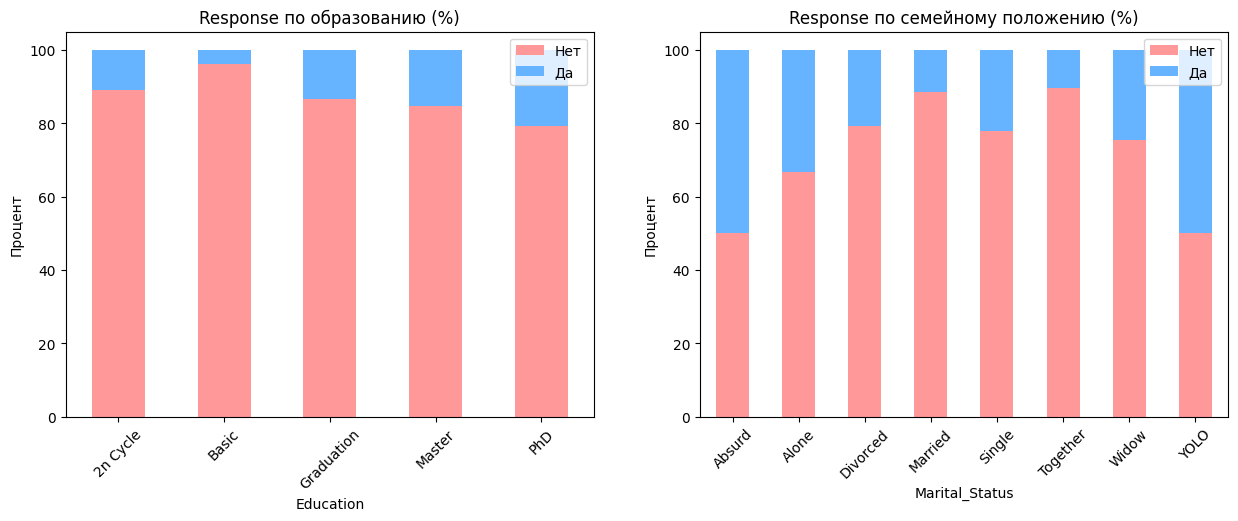

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Response по образованию
edu_response = pd.crosstab(df_eda['Education'], df_eda['Response'], normalize='index') * 100
edu_response.plot(kind='bar', stacked=True, ax=axes[0], color=['#ff9999', '#66b3ff'])
axes[0].set_title('Response по образованию (%)')
axes[0].set_ylabel('Процент')
axes[0].legend(['Нет', 'Да'])
axes[0].tick_params(axis='x', rotation=45)

# Response по семейному положению
marital_response = pd.crosstab(df_eda['Marital_Status'], df_eda['Response'], normalize='index') * 100
marital_response.plot(kind='bar', stacked=True, ax=axes[1], color=['#ff9999', '#66b3ff'])
axes[1].set_title('Response по семейному положению (%)')
axes[1].set_ylabel('Процент')
axes[1].legend(['Нет', 'Да'])
axes[1].tick_params(axis='x', rotation=45)
plt.show()

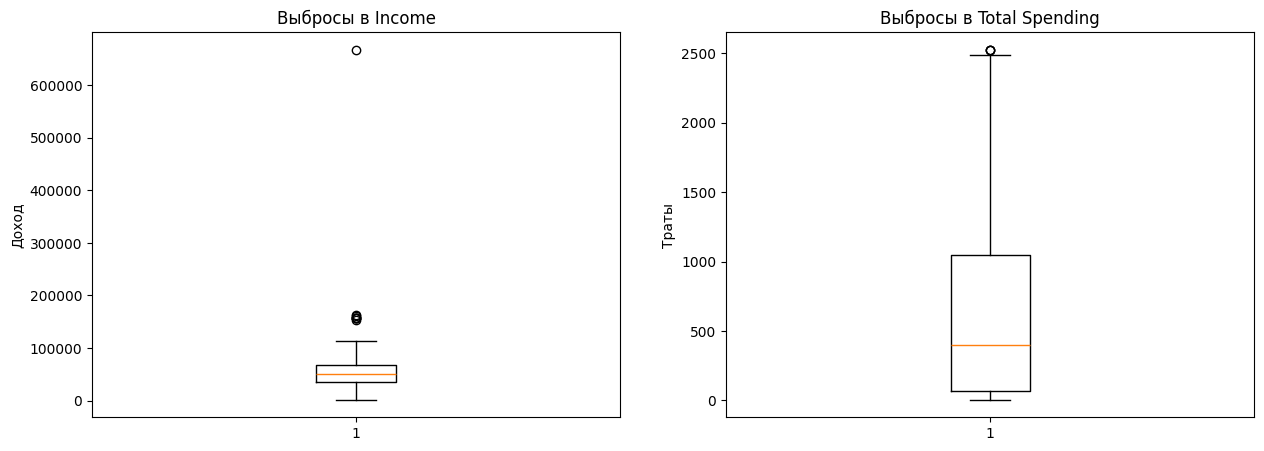


Количество выбросов:
Income: 8 выбросов (0.4%)
Total_Spending: 3 выбросов (0.1%)


In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot для дохода
axes[0].boxplot(df_eda['Income'].dropna())
axes[0].set_title('Выбросы в Income')
axes[0].set_ylabel('Доход')

# Boxplot для трат
axes[1].boxplot(df_eda['Total_Spending'])
axes[1].set_title('Выбросы в Total Spending')
axes[1].set_ylabel('Траты')
plt.show()

# Количество выбросов по методу IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

print("\nКоличество выбросов:")
for col in ['Income', 'Total_Spending']:
    if col in df_eda.columns:
        outliers = count_outliers(df_eda[col].dropna())
        print(f"{col}: {outliers} выбросов ({outliers/len(df_eda)*100:.1f}%)")

In [44]:
print(f"""
КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:

ДЕМОГРАФИЯ:
- Средний доход: {df_eda['Income'].mean():.0f}
- Самые частые образования: {df_eda['Education'].mode()[0]}

ПОВЕДЕНИЕ:
- Средние траты: {df_eda['Total_Spending'].mean():.0f}
- Среднее количество покупок: {df_eda['Total_Purchases'].mean():.1f}
- Средний отклик на кампании: {df_eda['Response'].mean()*100:.1f}%

ОСНОВНЫЕ ВЫВОДЫ:
1. Клиенты с высоким доходом тратят больше
2. Семьи с детьми имеют другие паттерны покупок
""")


КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:

ДЕМОГРАФИЯ:
- Средний доход: 52247
- Самые частые образования: Graduation

ПОВЕДЕНИЕ:
- Средние траты: 606
- Среднее количество покупок: 14.9
- Средний отклик на кампании: 14.9%

ОСНОВНЫЕ ВЫВОДЫ:
1. Клиенты с высоким доходом тратят больше
2. Семьи с детьми имеют другие паттерны покупок

